## Predicting Survival in the Titanic Data Set 
We will be using a decision tree to make predictions about the Titanic data  set from Kaggle. 
This data set provides information on the Titanic  passengers and can be used to predict whether a passenger survived or  not. 


### Import Libraries

In [45]:
import pandas as pd
from matplotlib import pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
import pydotplus
import collections

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

### Data Illustration

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Cleaning

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As you can see the column Age, Cabin & Embarked hold the null value. We need handle those before proceeding to next step.

In [8]:
df.iloc[:,5].fillna(df.iloc[:,5].mean(), inplace=True)

Taking mean of Age and replace with null value for 'Age' column

In [9]:
df.drop(columns=['Cabin','Embarked','PassengerId', 'Ticket'], axis=1, inplace=True)

Dropping the columns of 'Cabin', 'Embarked', 'PassengerId', 'Ticket' those are no longer in the part of prediction process.
If we include those the data variation will be high.

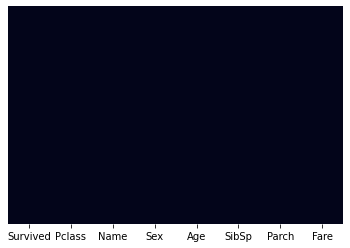

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

Verfiying in the heatmap to see any null values associated. 

In [11]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


### Data Analysis

([<matplotlib.patches.Wedge at 0x2e02807f100>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'NO'),
  Text(0.3925750313068116, -1.0275625746369201, 'YES')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

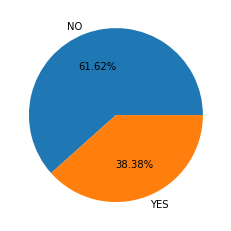

In [12]:
plot.pie(df.groupby('Survived')['Survived'].count(), autopct='%1.2f%%', labels=['NO','YES'])

From the pie chart, we can see only 38% of people are survived. Let's see in what cases are applicable in coming analysis.

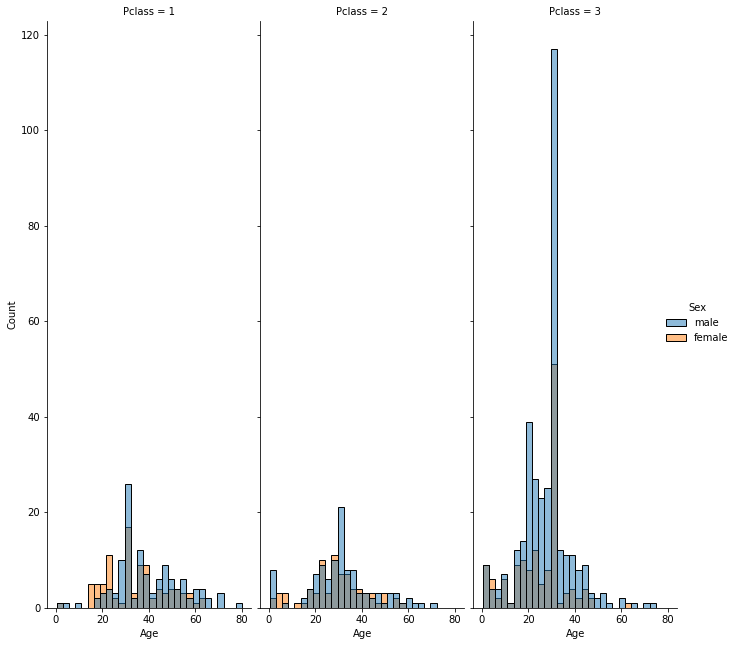

In [13]:
size = sns.displot(data=df, x='Age', hue='Sex', col='Pclass')
size.fig.set_figwidth(10)
size.fig.set_figheight(10)

The number of people who stayed at class-3 seems higher comapared to other class-1 & 2. Most of the people satyed in class-3 as 
Male.

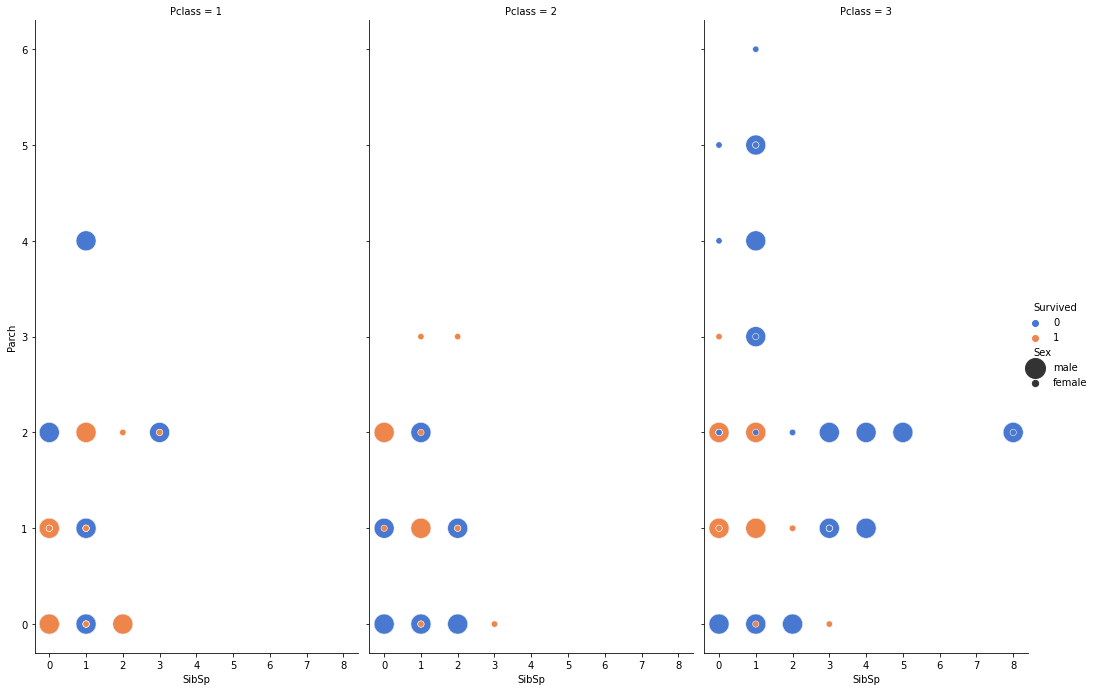

In [14]:
size = sns.relplot(x="SibSp", y='Parch', hue="Survived", size="Sex", col='Pclass',
            sizes=(40, 400), alpha=1.0, palette="muted",
            height=6, data=df)
size.fig.set_figwidth(15)
size.fig.set_figheight(10)

From the plot sibiling & spouse with Parents & childern are survived in certain threshold with respective to different classes.

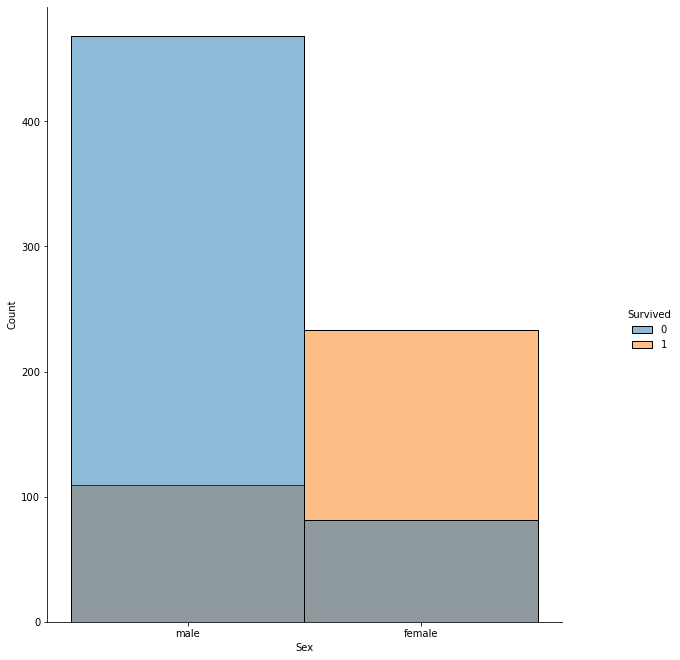

In [15]:
size = sns.displot(data=df, x='Sex', hue='Survived')
size.fig.set_figwidth(10)
size.fig.set_figheight(10)

From the chart the gender female is mostly survived

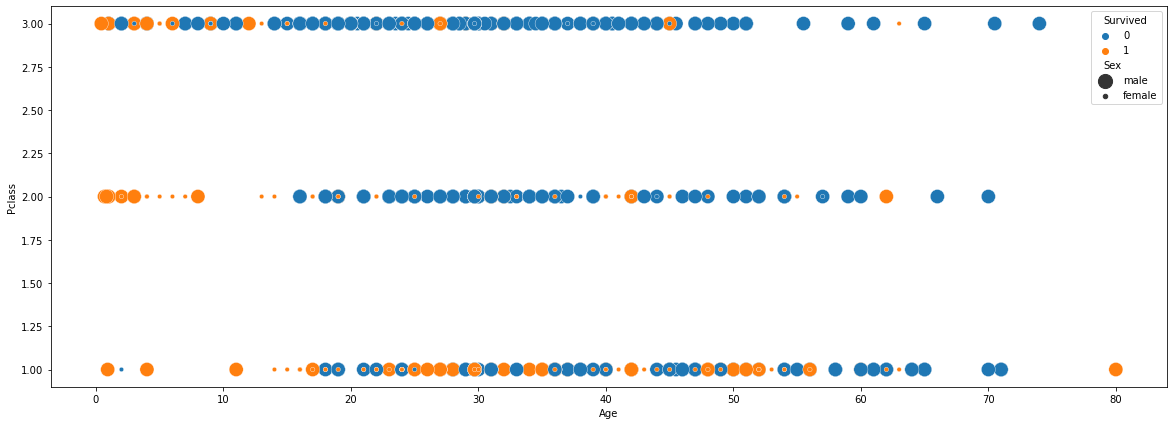

In [16]:
fig_dims = (20, 7)
fig, ax = plot.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x='Age', y='Pclass', hue='Survived', size='Sex',sizes=(20, 200), legend="full", ax=ax)

From the graph illustrates the people are in the class 1 are msotly survived comapred to  2 & 3. The class 2 is lies in next range of survival.

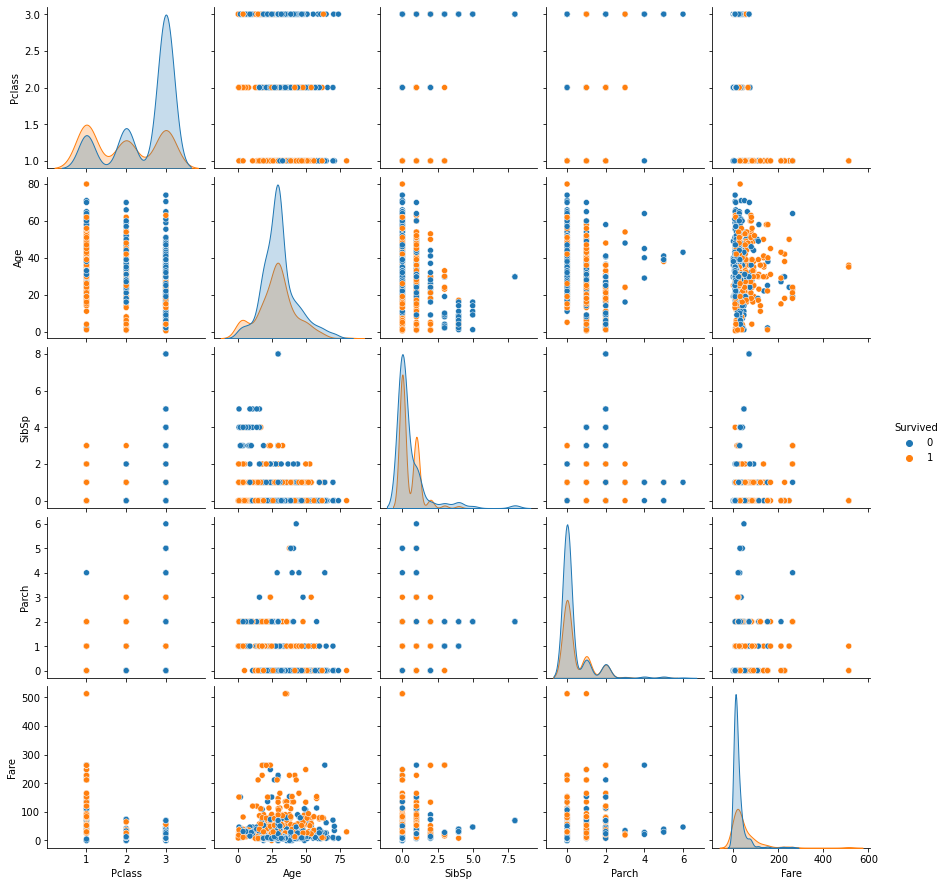

In [17]:
sns.pairplot(df, hue="Survived")

### Data Preprocessing

Encoding categorical data values (Transforming object data types to integers)

In [18]:
labelEncoder = LabelEncoder()

For 'Sex' column applying the transformation of '0' and '1'

In [19]:
df.iloc[:,3] = labelEncoder.fit_transform(df.iloc[:,3].values)

In [20]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500


The 'Male' & 'Female' value categorized to '1' & '0' respectively.

### Splitting the data in to dependent & independent variables

In [21]:
X = df.drop(columns=['Survived','Name'])
y= df.Survived

In [22]:
X.shape

(891, 6)

In [23]:
y.shape

(891,)

### Apply training & testing data 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=355)

In [25]:
X_train.shape

(623, 6)

In [26]:
y_train.shape

(623,)

In [27]:
X_test.shape

(268, 6)

In [28]:
y_test.shape

(268,)

### Apply Decision Tree model

In [29]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
decisionTree.score(X_train, y_train)

0.985553772070626

In [31]:
decisionTree.score(X_test, y_test)

0.7649253731343284

As you can see the training result provides 98% and test result 80%. Seems overfitting occurs. Let fine tune by apply hyper parameter tuning.
If still exists then apply the regularization as well.

In [32]:
pred = decisionTree.predict(X_test)

Apply hyperparameter tuning to get the optimal result

In [33]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [34]:
grid_search = GridSearchCV(estimator=decisionTree,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [35]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [36]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [37]:
decisionTree = DecisionTreeClassifier(criterion= 'entropy',max_depth= 31,min_samples_leaf= 6,min_samples_split= 9,splitter= 'random')
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=6,
                       min_samples_split=9, splitter='random')

In [38]:
decisionTree.score(X_train,y_train)

0.8282504012841091

In [39]:
decisionTree.score(X_test, y_test)

0.7910447761194029

This model provides 82% accuracy and provides the good result for the titanic dataset.